# Продуктовые гипотезы

В ходе работы исследоуем использование сервисов Т-Города и сформулируем предложения по улучшению продукта.

Т-Город — это группа сервисов, которые помогают пользователям решать ежедневные
задачи. Например, есть сервисы, которые позволяют купить билеты в кино или заказать
продукты. Основными считаются три сервиса: Топливо, Продукты и Афиша.

Топливо — сервис, который позволяет заправить машину, не выходя из нее, а оплатив
заправку дистанционно.

Продукты — сервис по доставке продуктов из различных магазинов. Например, можно
заказать домой продукты из Вкусвилла, Пятёрочки, Перекрёстка, Ленты.

Афиша — сервис по покупке билетов на различные мероприятия: в кино, театры и на
концерты.

## Загрузка данных

Для начала загрузим данные и изучим основную информацию.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns

In [2]:
data = pd.read_csv('D:/Быстрый доступ/downloads/city_clients.csv')
data.head()

,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,fuel_first_order_date,fuel_last_order_date,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,...,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
0,1002611776,1,1499.06,749.530000,2.0,2023-05-22,2024-07-08,NaN,NaN,NaN,...,798.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0
1,812910044,1,5600.68,1866.893333,3.0,2023-01-12,2024-03-30,NaN,NaN,NaN,...,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0
2,379196768,1,32831.06,1492.320909,22.0,2023-08-12,2024-09-28,3775.76,1887.88,2.0,...,512.0,457.0,0.0,457.0,0.0,457.0,0.0,457.0,21680.0,457.0
3,695174271,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,292.0,0.0,292.0,0.0,292.0,0.0,292.0,0.0,292.0
4,843828836,1,NaN,NaN,NaN,NaN,NaN,1687.82,1687.82,1.0,...,0.0,528.0,0.0,528.0,0.0,528.0,0.0,528.0,0.0,528.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 68 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   party_rk                        1000000 non-null  int64  
 1   gorod_client_flg                1000000 non-null  int64  
 2   fuel_gmv                        373971 non-null   float64
 3   fuel_avg_price                  373971 non-null   float64
 4   fuel_n_orders                   373971 non-null   float64
 5   fuel_first_order_date           373971 non-null   object 
 6   fuel_last_order_date            373971 non-null   object 
 7   supermarket_gmv                 105785 non-null   float64
 8   supermarket_avg_price           105785 non-null   float64
 9   supermarket_n_orders            105785 non-null   float64
 10  supermarket_first_order_date    105785 non-null   object 
 11  supermarket_last_order_date     105785 non-null   object 
 12  a

У нас есть 1 млн строк и 68 столбов. В столбцах с датами тип данных object, также в данных есть пропуски.

Переходим к предобработке данных.

## Предобработка данных

Изменим типы данных в столбцах с датами.

In [4]:
columns_with_date = ['fuel_first_order_date', 'fuel_last_order_date', 'supermarket_first_order_date',
                     'supermarket_last_order_date', 'afisha_first_order_date', 'afisha_last_order_date']
for column in columns_with_date:
    data[column] = pd.to_datetime(data[column])

Типы данных в порядке, теперь проверим дубликаты.

In [5]:
data.duplicated().sum()

0

In [6]:
data['party_rk'].duplicated().sum()

0

Дубликатов нет, теперь переходим к пропускам.

In [7]:
print(f'Минимальное количество заказов в столбце с сервисом "Топливо" {data["fuel_n_orders"].min()}')
print(f'Минимальное количество заказов в столбце с сервисом "Продукты" {data["supermarket_n_orders"].min()}')
print(f'Минимальное количество заказов в столбце с сервисом "Афиша" {data["afisha_n_orders"].min()}')

Минимальное количество заказов в столбце с сервисом "Топливо" 1.0
Минимальное количество заказов в столбце с сервисом "Продукты" 1.0
Минимальное количество заказов в столбце с сервисом "Афиша" 1.0


In [8]:
data['gender_cd'].unique()

array(['M', 'F', nan], dtype=object)

In [9]:
data['region'].value_counts().sort_values().head(3)

region
0.0      1
99.0    30
90.0    61
Name: count, dtype: int64

В столбцах про взаимодействие с Т-Городом пропуски вероятно означают, что клиент не пользовался сервисом потому, что в столбцах с количеством заказов в разных сервисах минимальные значения единицы. Эти столбцы заполним нулями. Столбец с регионом заполним -1. В столбец с полом добавим "A" (аноним). Столбец с названием должности заполним "Не указано". Даты заполним минимальными датами минус 30 дней. Всё остальное заполним медианами.

Приступим к заполнению пропусков.

In [10]:
columns_interaction = ['fuel_gmv', 'fuel_avg_price', 'fuel_n_orders', 'supermarket_gmv', 'supermarket_avg_price',
                       'supermarket_n_orders','afisha_gmv', 'afisha_avg_price', 'afisha_n_orders']

for column in columns_interaction:
    data[column] = data[column].fillna(0)

data['gender_cd'] = data['gender_cd'].fillna('A')
data['region'] = data['region'].fillna(-1)
data['job_title'] = data['job_title'].fillna('Не указано')

columns_date = ['fuel_first_order_date', 'fuel_last_order_date', 'supermarket_first_order_date', 'supermarket_last_order_date',
               'afisha_first_order_date', 'afisha_last_order_date']
for column in columns_date:
    data[column] = data[column].fillna(data[column].min() - timedelta(days=30))

for column in data.drop(['gender_cd', 'job_title'], axis=1).columns: 
    # столбцы без пропусков не изменятся, а в столбцы с пропусками вставим медианы
    data[column] = data[column].fillna(data[column].median())

Изменили типы данных, проверили дубликаты, избавились от пропусков, теперь переходим к разведочному анализу данных.

## Разведочный анализ данных (EDA)

Найдем типичного клиента Т-Города.

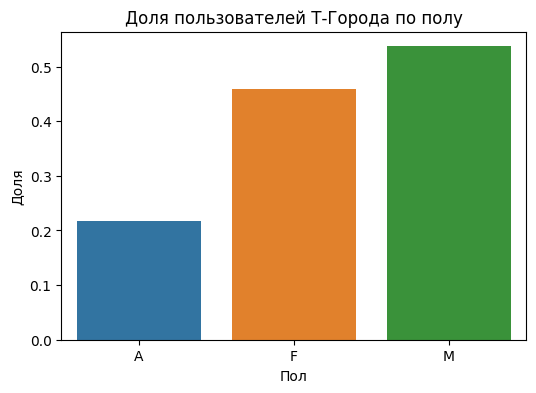

In [11]:
gender_cd_gorod_client_flg = data.groupby('gender_cd', as_index=False)['gorod_client_flg'].mean()
plt.figure(figsize=(6,4))
sns.barplot(x=gender_cd_gorod_client_flg['gender_cd'], y=gender_cd_gorod_client_flg['gorod_client_flg'])
plt.title('Доля пользователей Т-Города по полу')
plt.xlabel('Пол')
plt.ylabel('Доля')
plt.show()

Больше 50% мужчин покупали в Т-Городе.

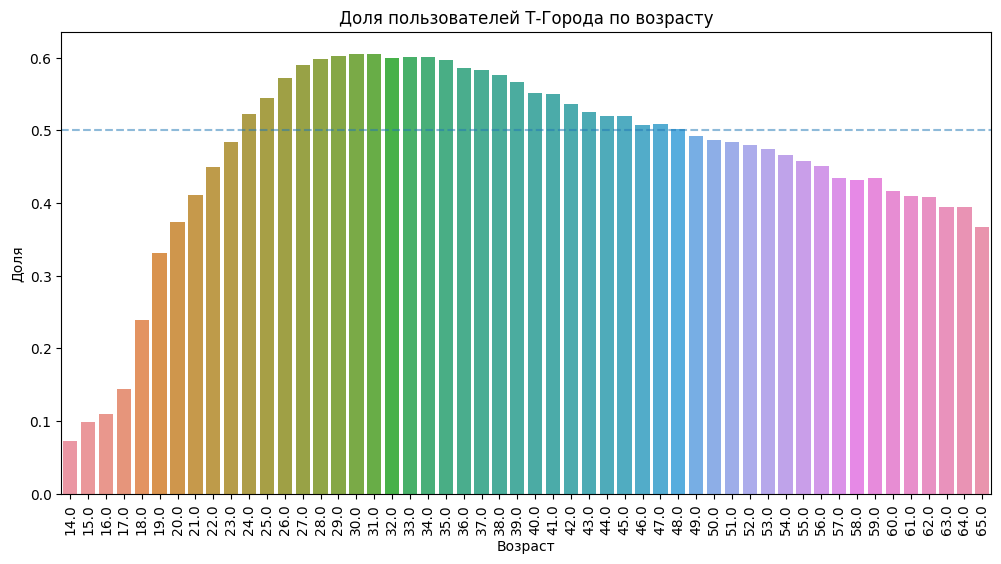

In [12]:
age_gorod_client_flg = data.groupby('age', as_index=False).agg({'party_rk': 'count', 'gorod_client_flg': 'mean'})
# оставим только те возраста, где клиентов больше 3000
age_gorod_client_flg = age_gorod_client_flg[age_gorod_client_flg['party_rk'] > 3000]

plt.figure(figsize=(12,6))
sns.barplot(x=age_gorod_client_flg['age'], y=age_gorod_client_flg['gorod_client_flg'])
plt.axhline(y=0.5, linestyle='--', alpha=0.5)
plt.xticks(rotation=90)
plt.title('Доля пользователей Т-Города по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Доля')
plt.show()

Более 50% клиентов возрастом от 24 до 48 лет пользовались Т-Городом.

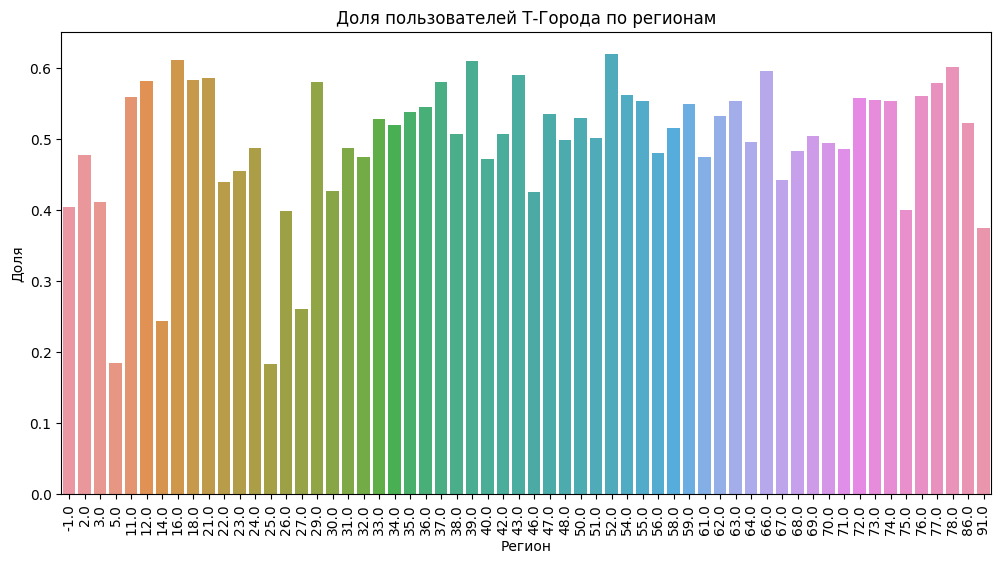

In [13]:
region_gorod_client_flg = data.groupby('region', as_index=False).agg({'party_rk': 'count', 'gorod_client_flg': 'mean'})
region_gorod_client_flg = region_gorod_client_flg[region_gorod_client_flg['party_rk'] > 3000]

plt.figure(figsize=(12,6))
sns.barplot(x=region_gorod_client_flg['region'], y=region_gorod_client_flg['gorod_client_flg'])
plt.xticks(rotation=90)
plt.title('Доля пользователей Т-Города по регионам')
plt.xlabel('Регион')
plt.ylabel('Доля')
plt.show()

В 5, 14, 25 и 27 регионах доли пользователей Т-Города значительно ниже, чем в других регионах.

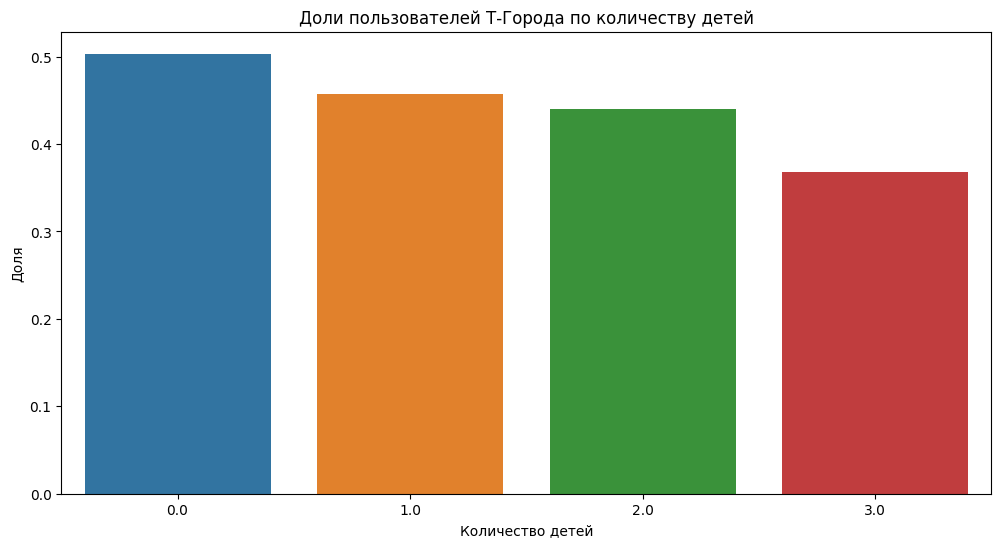

In [14]:
children_cnt_gorod_client_flg = (data.groupby('children_cnt', as_index=False)
                                 .agg({'party_rk': 'count', 'gorod_client_flg': 'mean'}))
children_cnt_gorod_client_flg = children_cnt_gorod_client_flg[children_cnt_gorod_client_flg['party_rk'] > 3000]

plt.figure(figsize=(12,6))
sns.barplot(x=children_cnt_gorod_client_flg['children_cnt'], y=children_cnt_gorod_client_flg['gorod_client_flg'])
plt.title('Доли пользователей Т-Города по количеству детей')
plt.xlabel('Количество детей')
plt.ylabel('Доля')
plt.show()

С увеличением количества детей у клиентов, уменьшается доля пользователей Т-Города.

Типичный клиент Т-Города - это мужчина или женщина от 24 до 48 лет из любого региона кроме 5, 14, 25 и 27 с 0-3 детьми.

Проверим отношение трат в Т-Городе к транзикциям в тех же категориях по полу, возрасту, региону и количеству детей клиентов.

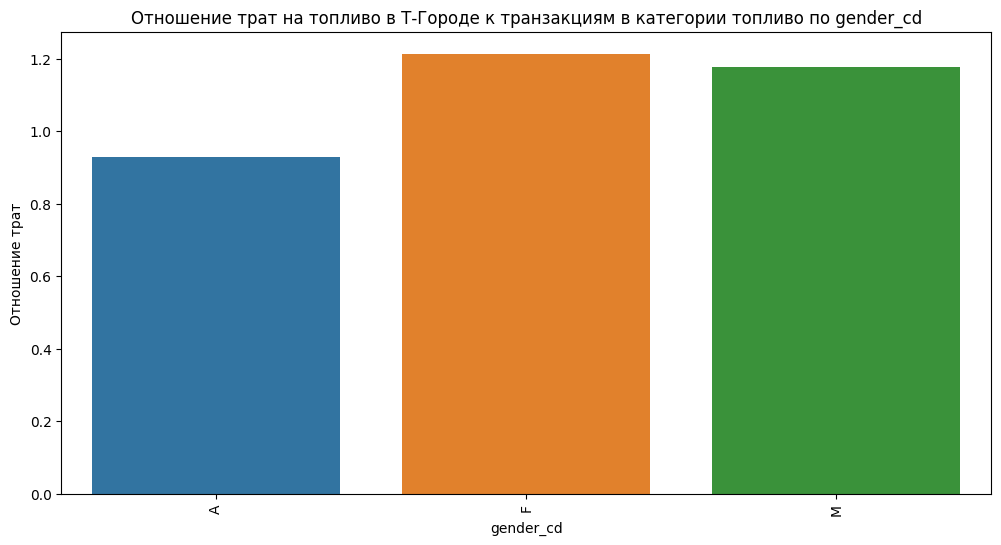

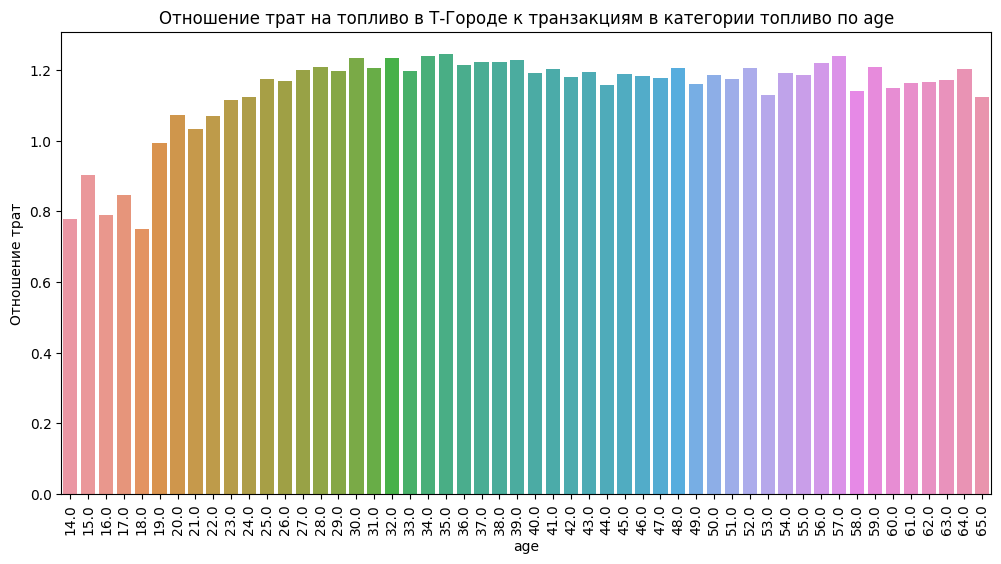

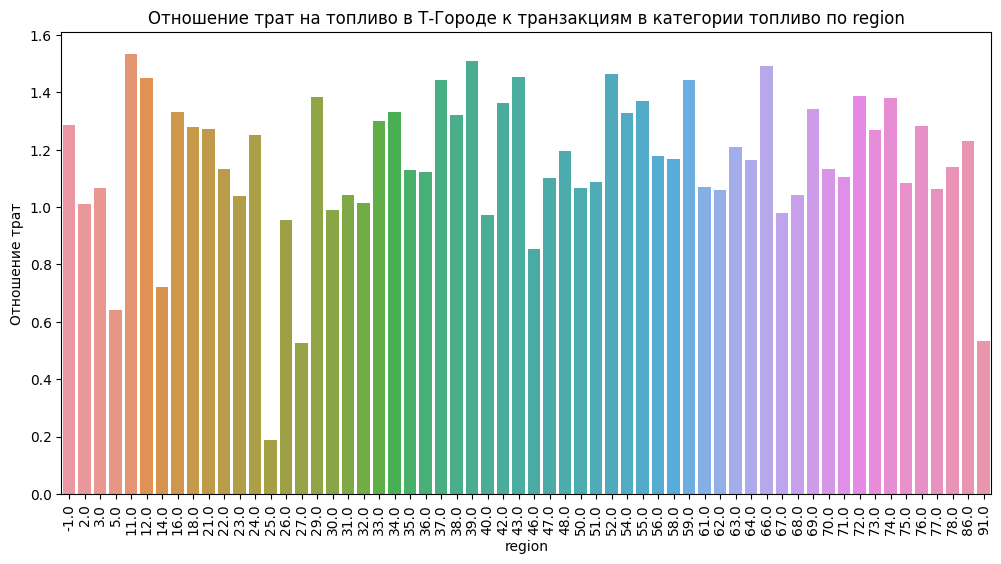

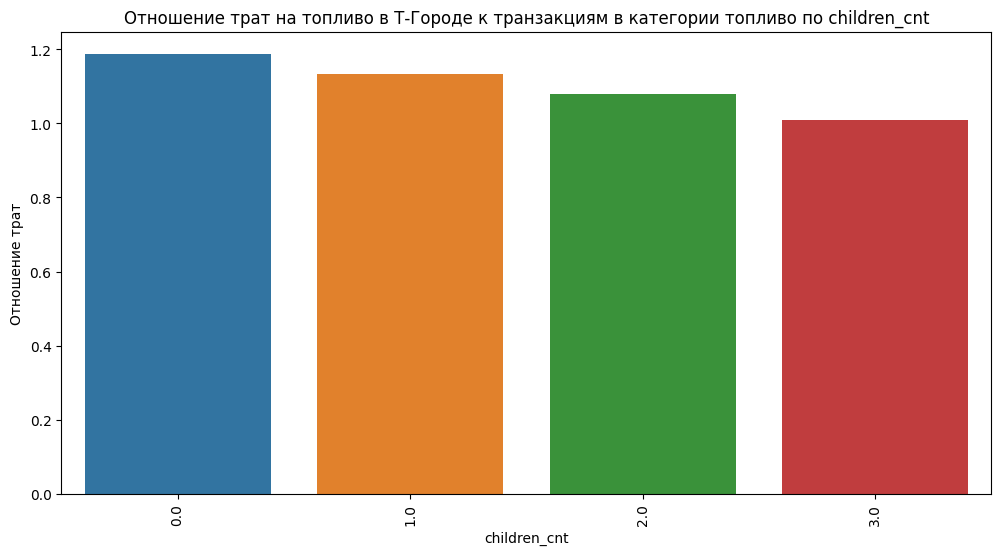

In [15]:
client = ['gender_cd', 'age', 'region', 'children_cnt']

for column in client:
    fuel = data.groupby(column, as_index=False).agg({'party_rk': 'count', 'fuel_gmv': 'mean', 'toplivo_gmv':'mean'})
    fuel = fuel[fuel['party_rk'] > 3000]
    fuel['%_t_gorod'] = fuel['fuel_gmv'] / fuel['toplivo_gmv']
    plt.figure(figsize=(12,6))
    sns.barplot(x=fuel[column], y=fuel['%_t_gorod'])
    plt.xticks(rotation=90)
    plt.title(f'Отношение трат на топливо в Т-Городе к транзакциям в категории топливо по {column}')
    plt.xlabel(column)
    plt.ylabel('Отношение трат')
    plt.show()

В 5, 14, 25, 27 и 91 регионе отношение трат на топливо к транзакциям в категории топливо сильно ниже, чем в других регионах.

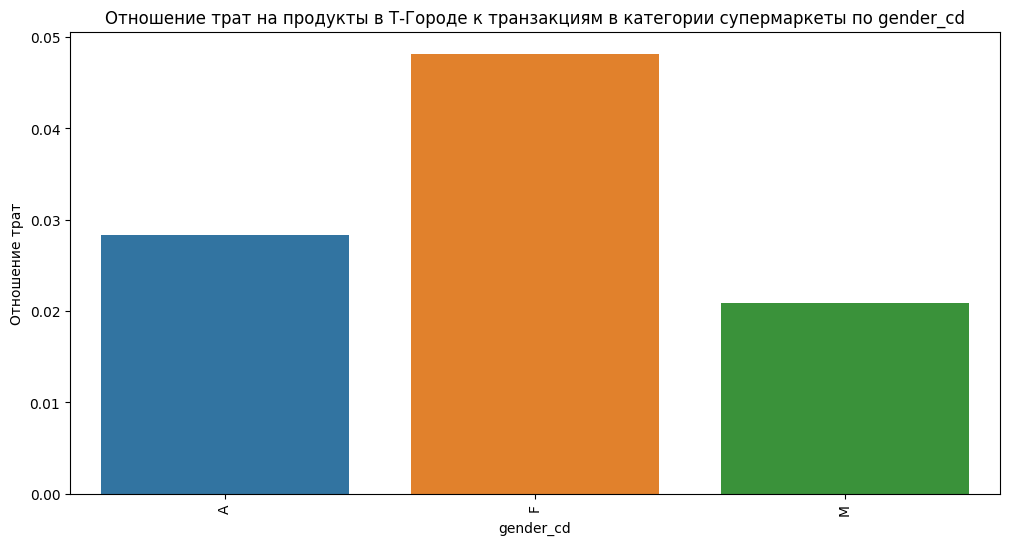

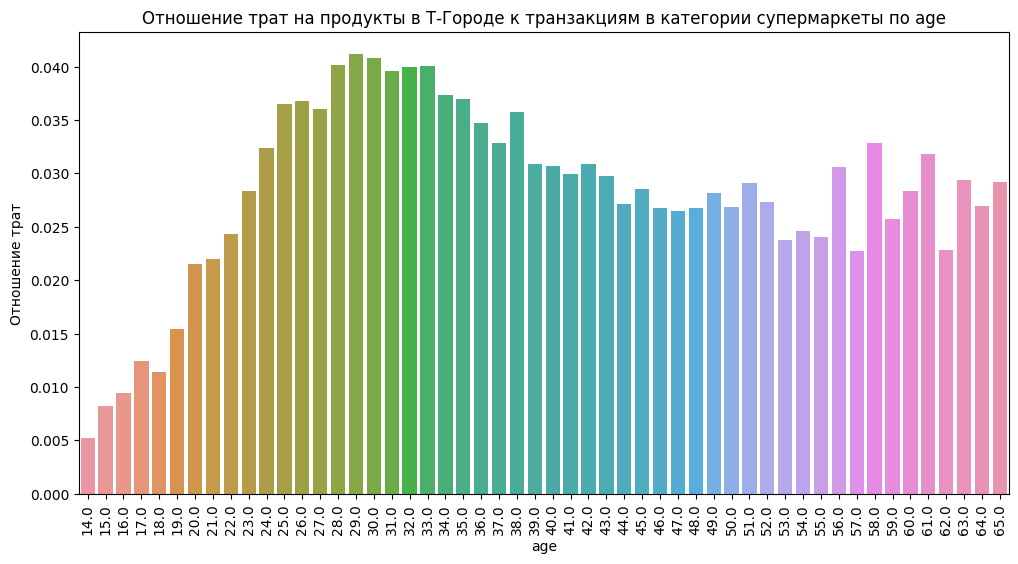

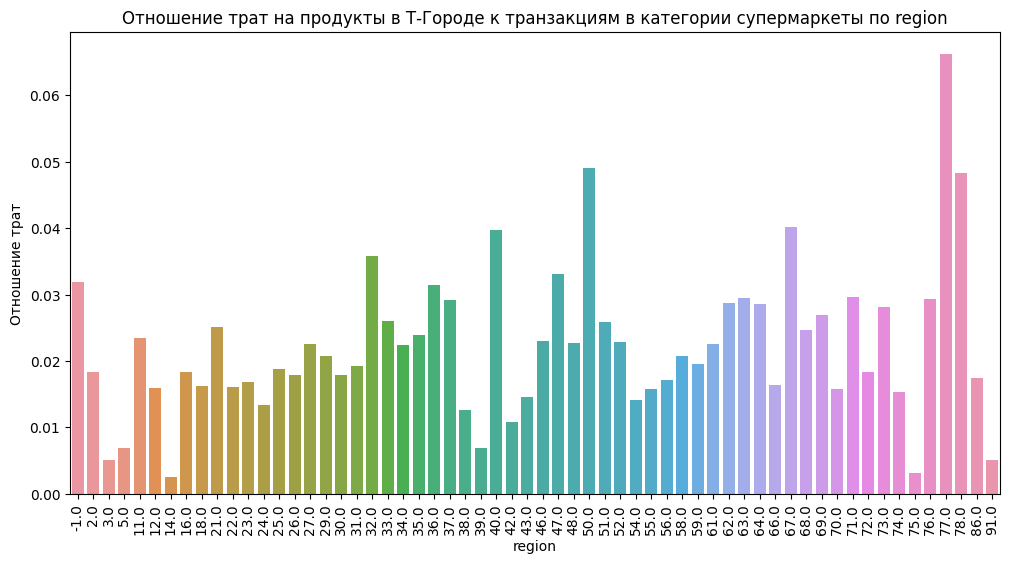

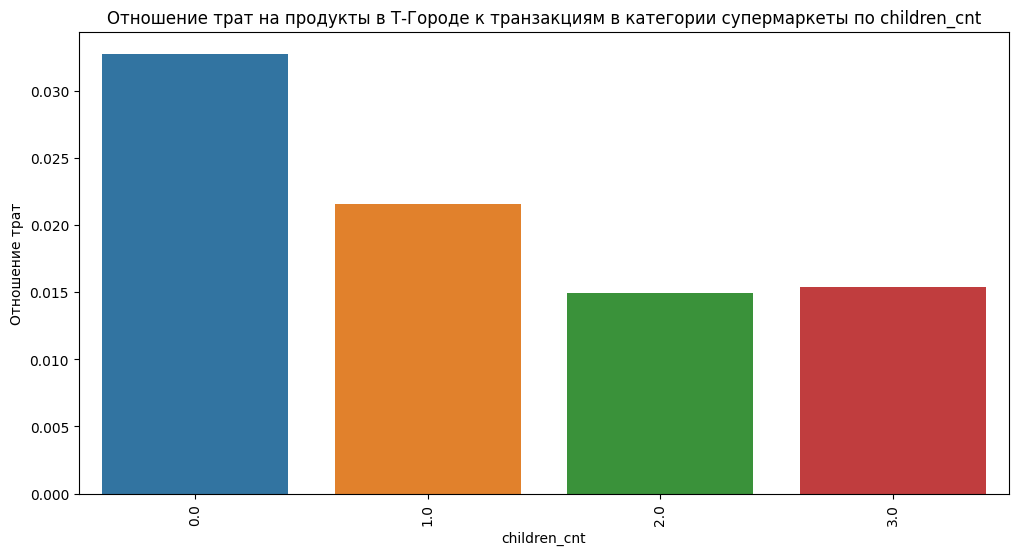

In [16]:
for column in client:
    supermarket = (data.groupby(column, as_index=False)
                   .agg({'party_rk': 'count', 'supermarket_gmv': 'mean', 'supermarkety_gmv':'mean'}))
    supermarket = supermarket[supermarket['party_rk'] > 3000]
    supermarket['%_t_gorod'] = supermarket['supermarket_gmv'] / supermarket['supermarkety_gmv']
    plt.figure(figsize=(12,6))
    sns.barplot(x=supermarket[column], y=supermarket['%_t_gorod'])
    plt.xticks(rotation=90)
    plt.title(f'Отношение трат на продукты в Т-Городе к транзакциям в категории супермаркеты по {column}')
    plt.xlabel(column)
    plt.ylabel('Отношение трат')
    plt.show()

У женщин отношение трат на продукты в городе к транзакциям в категории сумермаркеты в 2 раза выше, чем у мужчин. У клиентов в возрасте от 25 до 38 лучший показатель отношения трат на продукты в Т-Городе к транзакциям в категории супермаркеты. В 3, 5, 14, 39, 75 и 91 регионах худшие показатели отношения трат на продукты в Т-Городе к транзакциям в категории супермаркеты. У клиентов с 2-3 детьми худшие показатели отношения трат на продукты в Т-Городе к транзакциям в категории супермаркеты.

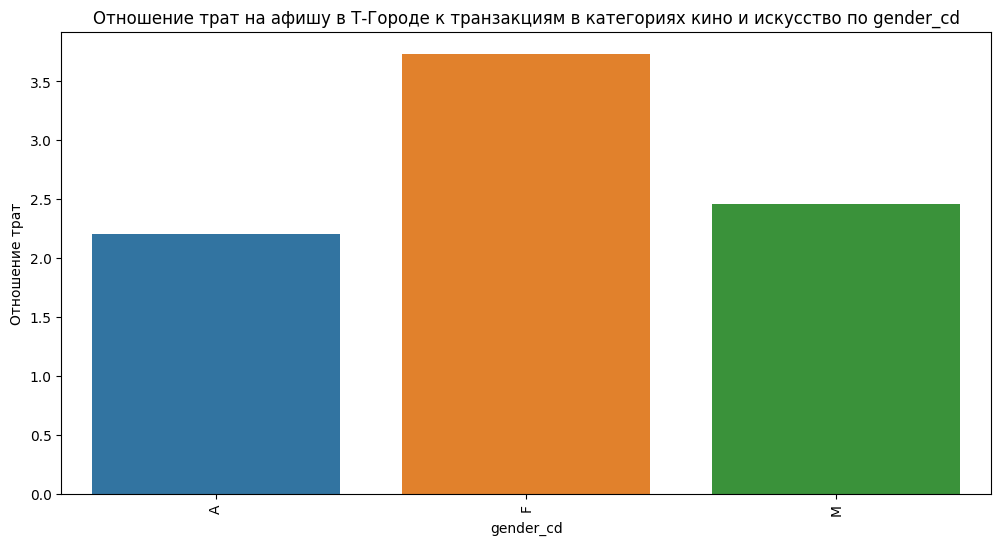

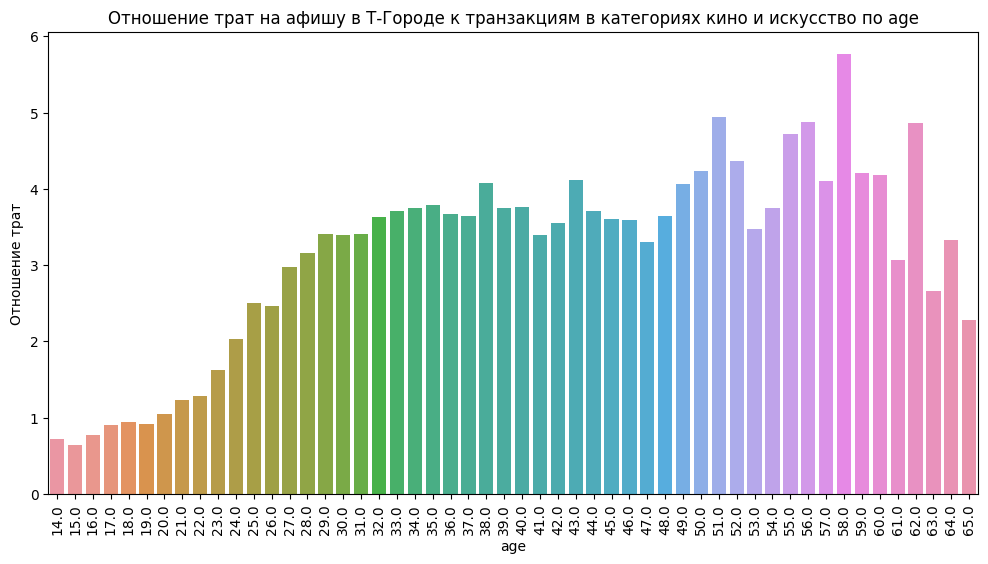

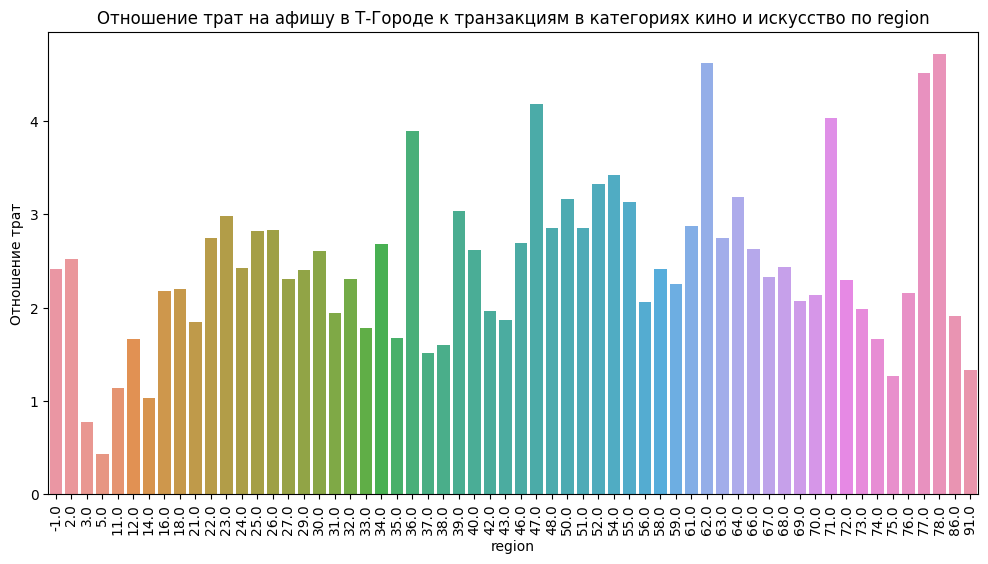

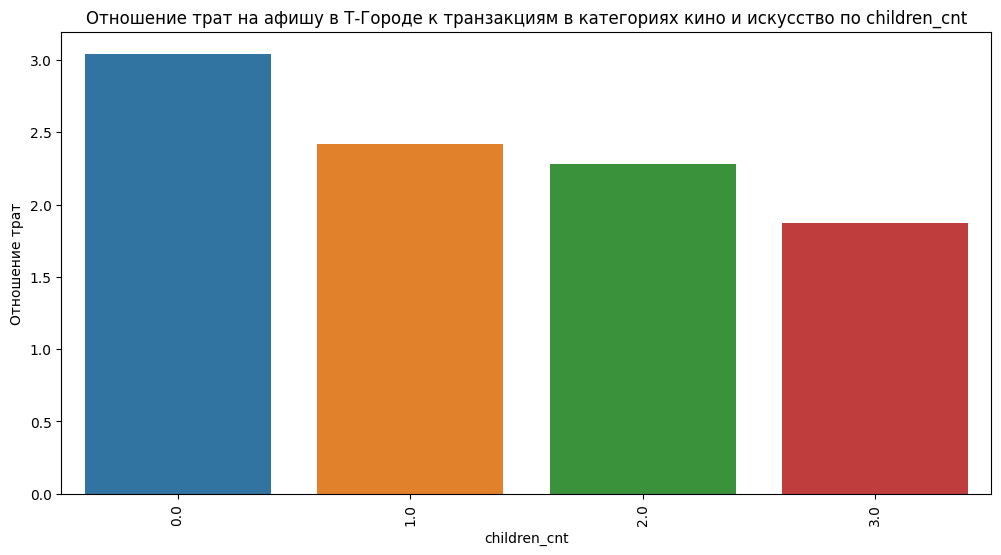

In [17]:
for column in client:
    afisha = (data.groupby(column, as_index=False)
                   .agg({'party_rk': 'count', 'afisha_gmv': 'mean', 'iskusstvo_gmv':'mean', 'kino_gmv': 'mean'}))
    afisha = afisha[afisha['party_rk'] > 3000]
    afisha['%_t_gorod'] = afisha['afisha_gmv'] / (afisha['iskusstvo_gmv'] + afisha['kino_gmv'])
    plt.figure(figsize=(12,6))
    sns.barplot(x=afisha[column], y=afisha['%_t_gorod'])
    plt.xticks(rotation=90)
    plt.title(f'Отношение трат на афишу в Т-Городе к транзакциям в категориях кино и искусство по {column}')
    plt.xlabel(column)
    plt.ylabel('Отношение трат')
    plt.show()

У женщин показатель отношения трат на афишу в Т-Городе к транзакциям в категориях кино и искусство в 1.5 раза выше, чем у мужчин. У клиентов младше 27 лет худший показатель отношения трат на афишу в Т-Городе к транзакциям в категориях кино и искусство. В 3, 5, 11 и 14 регионах худший показатель отношения трат на афишу в Т-Городе к транзакциям в категориях кино и искусство. У клиентов с 3 детьми худший показатель отношения трат на афишу в Т-Городе к транзакциям в категориях кино и искусство.

Проверим средние суммы заказов в Т-Городе по полу, возрасту, региону и количеству детей.

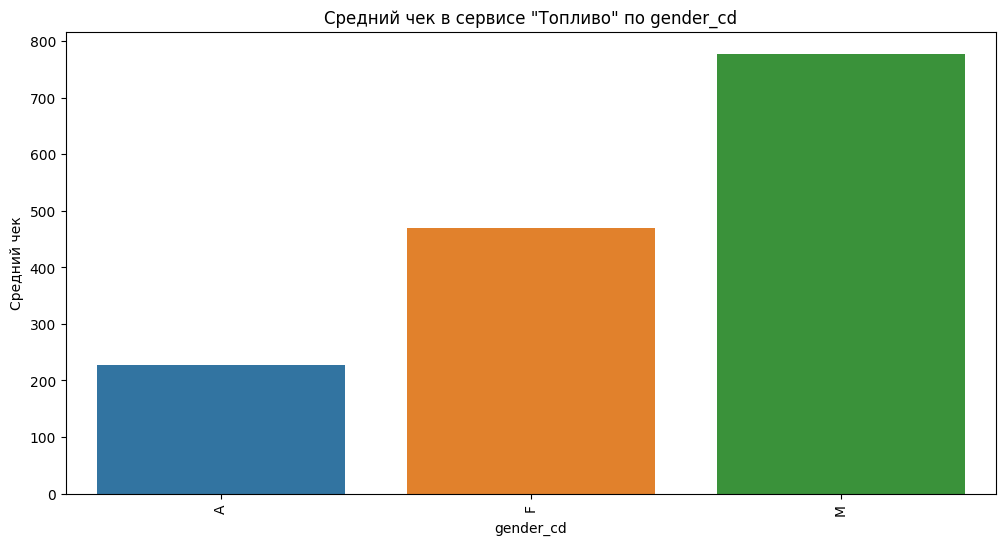

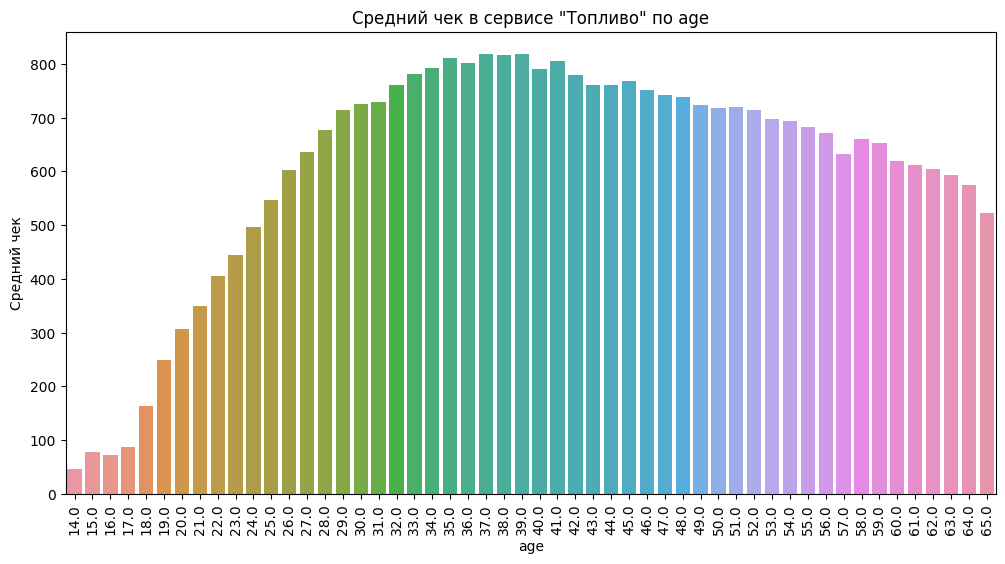

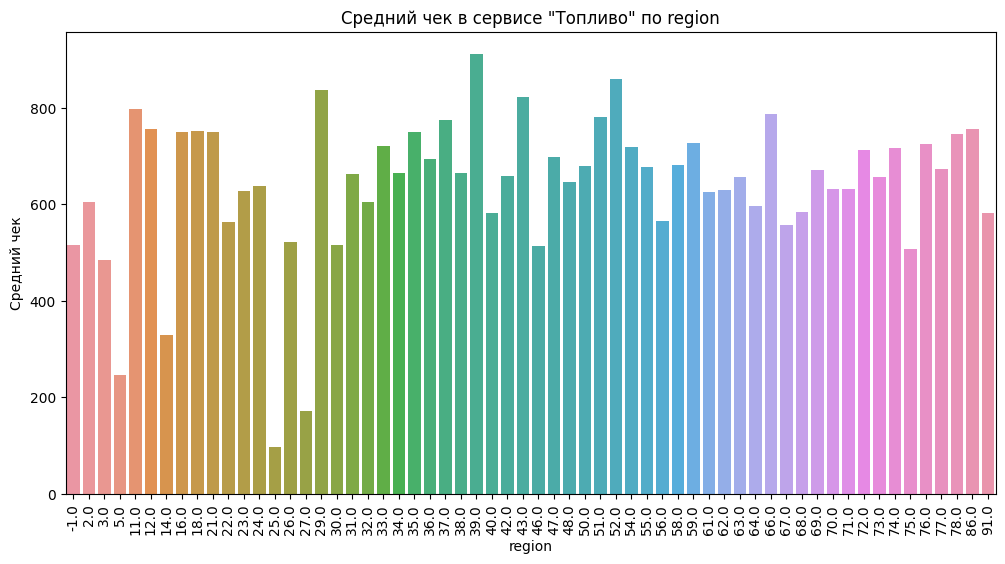

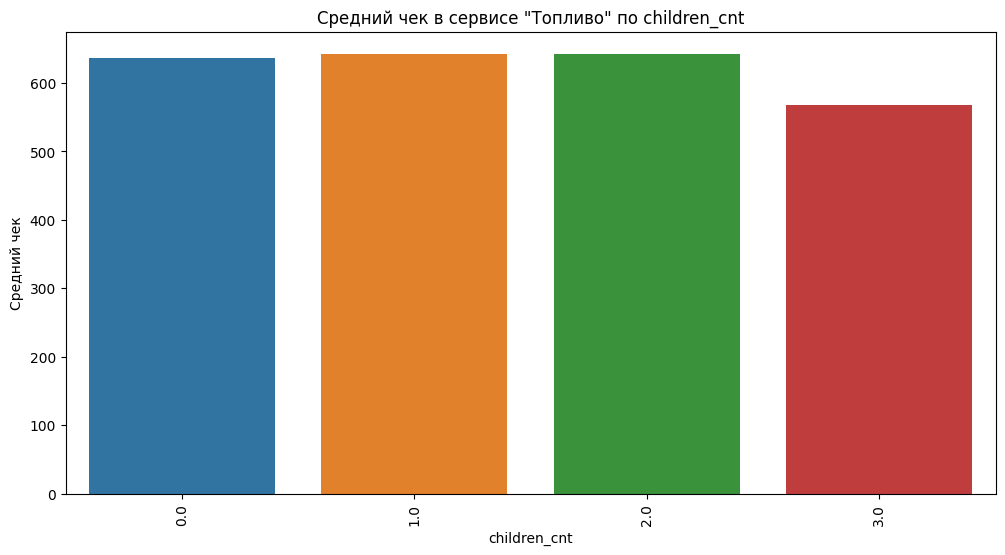

In [18]:
for column in client:
    fuel_avg = data.groupby(column, as_index=False).agg({'fuel_avg_price': 'mean', 'party_rk': 'count'})
    fuel_avg = fuel_avg[fuel_avg['party_rk'] > 3000]
    plt.figure(figsize=(12,6))
    sns.barplot(x=fuel_avg[column], y=fuel_avg['fuel_avg_price'])
    plt.xticks(rotation=90)
    plt.title(f'Средний чек в сервисе "Топливо" по {column}')
    plt.xlabel(column)
    plt.ylabel('Средний чек')
    plt.show()

В сервисе "Топливо" средний чек выше у мужчин, чем у женщин; у клиентов младше 26 лет с уменьшением возраста средний чек падает и он значительно ниже, чем у клиентов возрастом 26 и более лет; в 5, 14, 25 и 27 регионах средний чек значительно ниже, чем в других регионах.

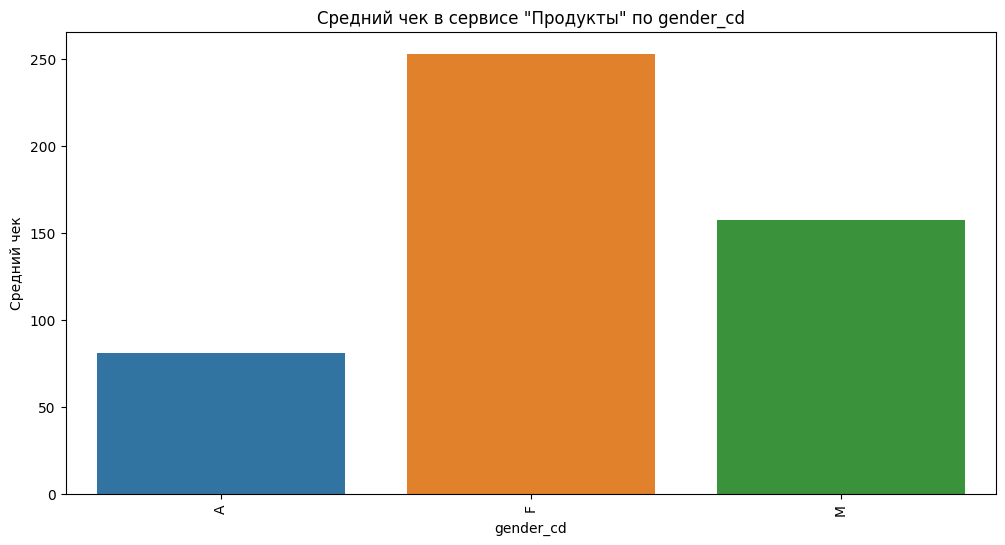

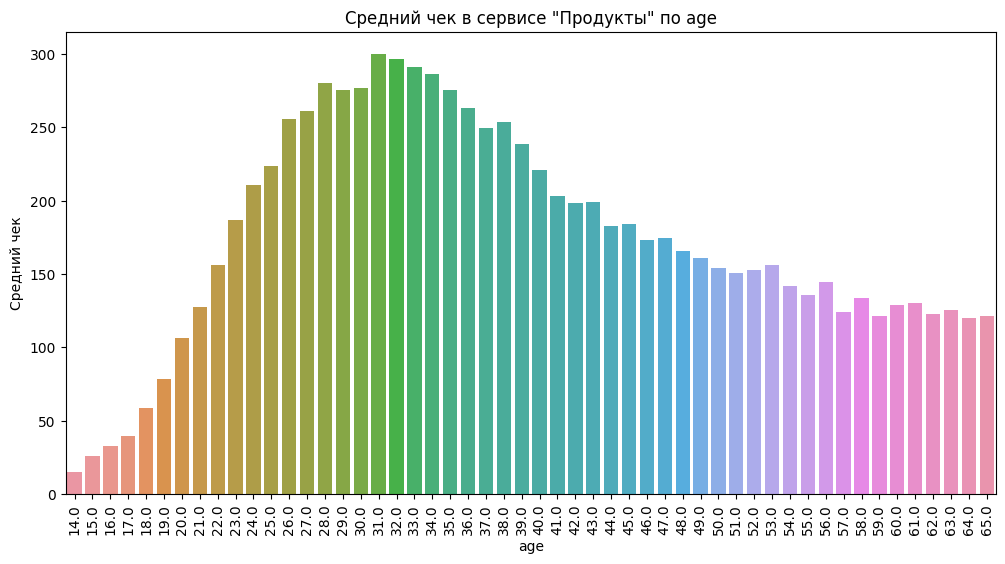

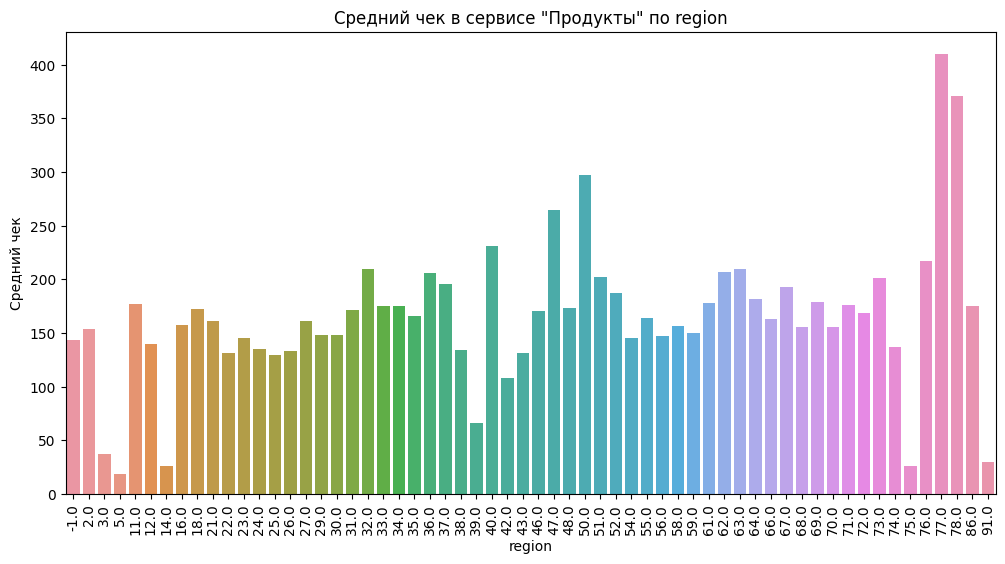

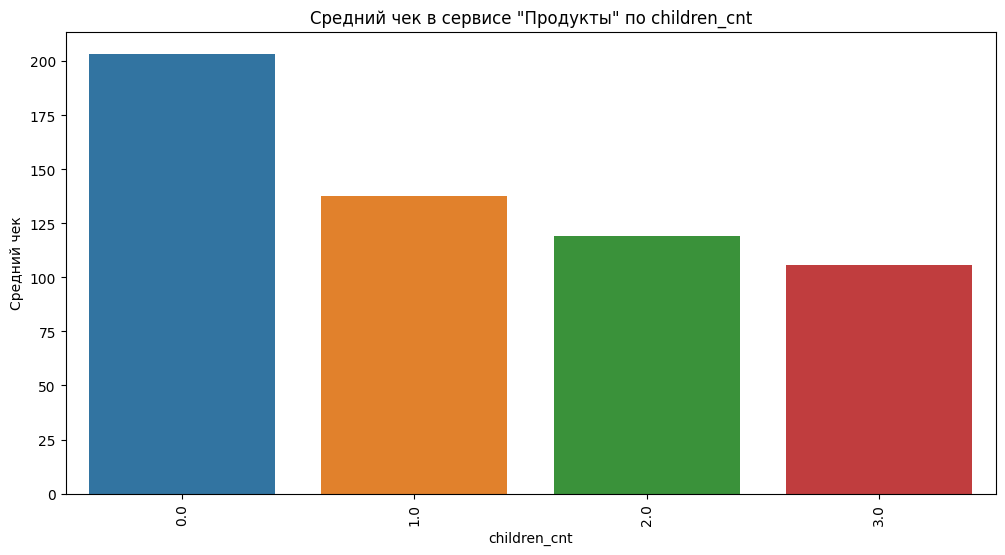

In [19]:
for column in client:
    supermarket_avg = data.groupby(column, as_index=False).agg({'supermarket_avg_price': 'mean', 'party_rk': 'count'})
    supermarket_avg = supermarket_avg[supermarket_avg['party_rk'] > 3000]
    plt.figure(figsize=(12,6))
    sns.barplot(x=supermarket_avg[column], y=supermarket_avg['supermarket_avg_price'])
    plt.xticks(rotation=90)
    plt.title(f'Средний чек в сервисе "Продукты" по {column}')
    plt.xlabel(column)
    plt.ylabel('Средний чек')
    plt.show()

В сервисе "Продукты" средний чек у женщин выше, чем у мужчин; лучший средний чек у клиентов с 26 до 39 лет, чем дальше от этого промежутка, тем ниже средний чек; в 3, 5, 14, 39, 75 и 91 регионах средний чек значительно ниже, чем в других регионах.

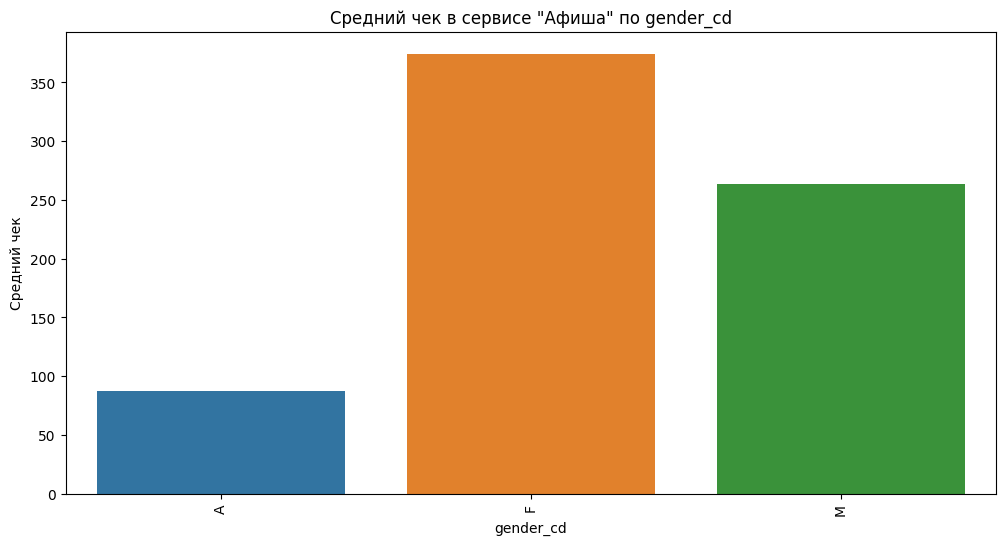

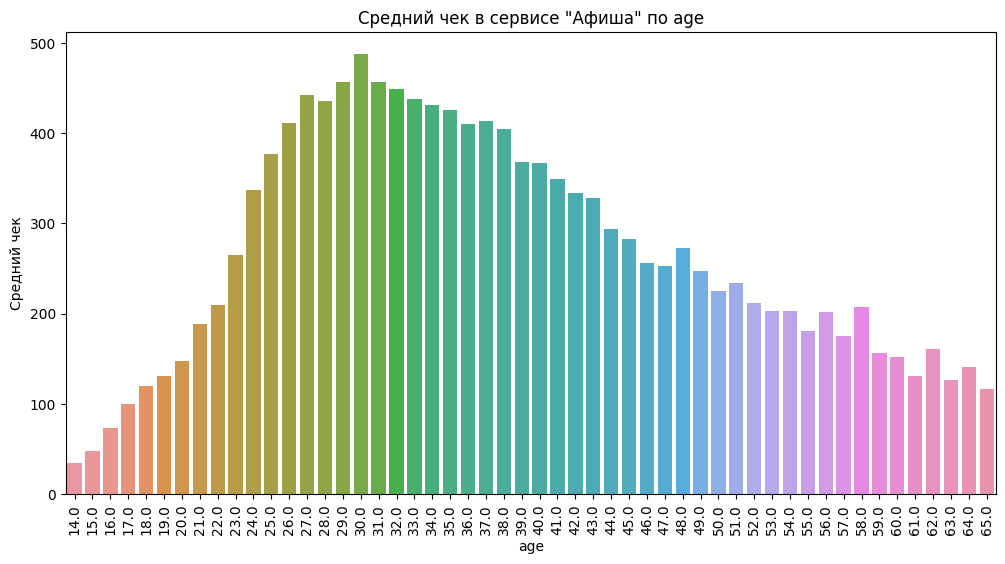

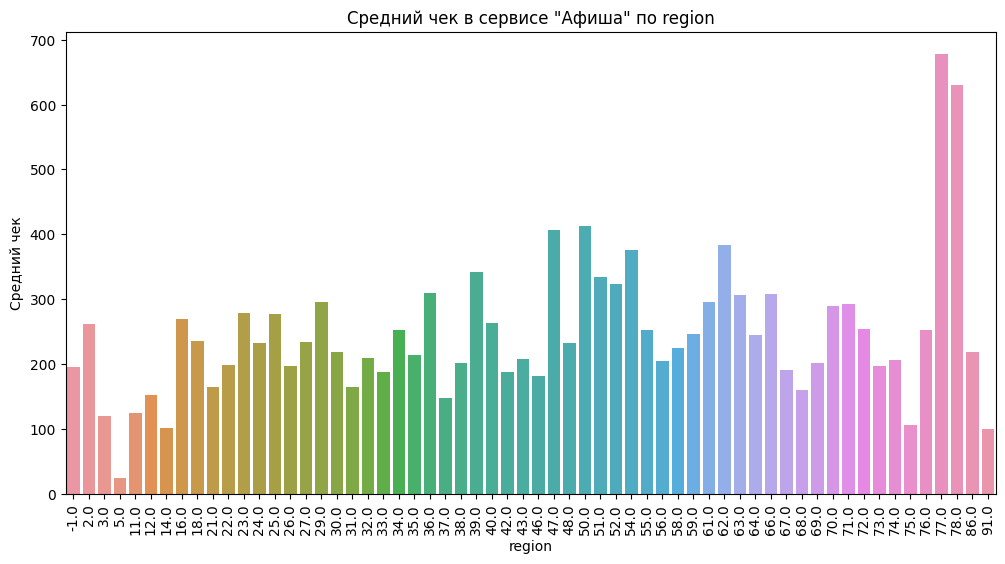

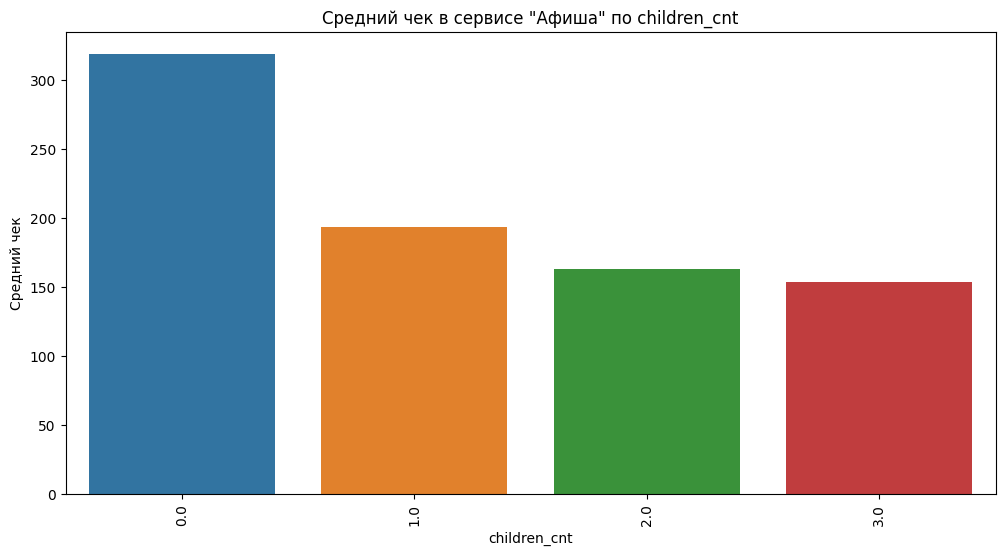

In [20]:
for column in client:
    afisha_avg = data.groupby(column, as_index=False).agg({'afisha_avg_price': 'mean', 'party_rk': 'count'})
    afisha_avg = afisha_avg[afisha_avg['party_rk'] > 3000]
    plt.figure(figsize=(12,6))
    sns.barplot(x=afisha_avg[column], y=afisha_avg['afisha_avg_price'])
    plt.xticks(rotation=90)
    plt.title(f'Средний чек в сервисе "Афиша" по {column}')
    plt.xlabel(column)
    plt.ylabel('Средний чек')
    plt.show()

В сервисе "Афиша" средний чек у женщин выше, чем у мужчин; у клиентов возрастом от 26 до 38 лет лучший средний чек; в 5 регионе средний чек значительно ниже, чем в других регионах.

Определим долю сервисов Т-Банка.

In [21]:
fuel = data['fuel_gmv'].mean() / (data['fuel_gmv'].mean() + data['toplivo_gmv'].mean())
supermarket = data['supermarket_gmv'].mean() / (data['supermarket_gmv'].mean() + data['supermarkety_gmv'].mean())
afisha = data['afisha_gmv'].mean() / (data['afisha_gmv'].mean() + data['iskusstvo_gmv'].mean() + data['kino_gmv'].mean())
print(f'Общая доля сервисов Т-Банка {round((fuel + supermarket + afisha) / 3 * 100, 2)}%')

Общая доля сервисов Т-Банка 44.14%


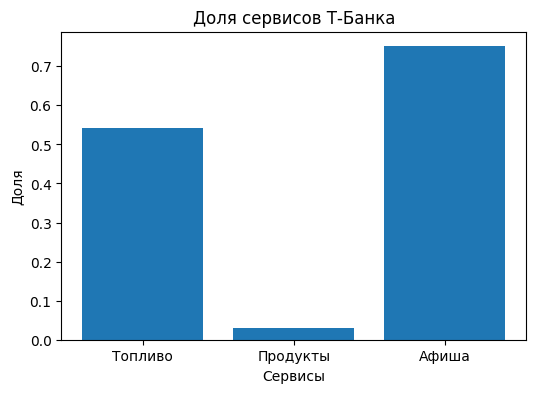

In [22]:
plt.figure(figsize=(6,4))
plt.bar(['Топливо', 'Продукты', 'Афиша'], [fuel, supermarket, afisha])
plt.title('Доля сервисов Т-Банка')
plt.xlabel('Сервисы')
plt.ylabel('Доля')
plt.show()

Общая доля сервисов Т-Банка примерно 44.14%. Доля сервиса "Топливо" около 54%, "Продукты" - около 3%, "Афиша" - около 75%.

## Выводы

- Типичный клиент Т-Города - это мужчина или женщина от 24 до 48 лет из любого региона кроме 5, 14, 25 и 27 с 0-3 детьми.

Пол:
- У женщин отношение трат на продукты в городе к транзакциям в категории сумермаркеты в 2 раза выше, чем у мужчин;
- У женщин показатель отношения трат на афишу в Т-Городе к транзакциям в категориях кино и искусство в 1.5 раза выше, чем у мужчин;
- В сервисе "Топливо" средний чек выше у мужчин, чем у женщин;
- В сервисе "Продукты" средний чек у женщин выше, чем у мужчин;
- В сервисе "Афиша" средний чек у женщин выше, чем у мужчин.

Возраст:
- У клиентов в возрасте от 25 до 38 лучший показатель отношения трат на продукты в Т-Городе к транзакциям в категории супермаркеты;
- У клиентов младше 27 лет худший показатель отношения трат на афишу в Т-Городе к транзакциям в категориях кино и искусство;
- В сервисе "Топливо" у клиентов младше 26 лет с уменьшением возраста средний чек падает и он значительно ниже, чем у клиентов возрастом 26 и более лет;
- В сервисе "Продукты" лучший средний чек у клиентов с 26 до 39 лет, чем дальше от этого промежутка, тем ниже средний чек;
- В сервисе "Афиша" у клиентов возрастом от 26 до 38 лет лучший средний чек.

Регионы:
- В 5, 14, 25 и 27 регионах доли пользователей Т-Города значительно ниже, чем в других регионах;
- В 5, 14, 25, 27 и 91 регионе отношение трат на топливо к транзакциям в категории топливо сильно ниже, чем в других регионах;
- В 3, 5, 14, 39, 75 и 91 регионах худшие показатели отношения трат на продукты в Т-Городе к транзакциям в категории супермаркеты;
- В 3, 5, 11 и 14 регионах худший показатель отношения трат на афишу в Т-Городе к транзакциям в категориях кино и искусство;
- В сервисе "Топливо" в 5, 14, 25 и 27 регионах средний чек значительно ниже, чем в других регионах;
- В сервисе "Продукты" в 3, 5, 14, 39, 75 и 91 регионах средний чек значительно ниже, чем в других регионах;
- В сервисе "Афиша" в 5 регионе средний чек значительно ниже, чем в других регионах.

Дети:
- У клиентов с 2-3 детьми худшие показатели отношения трат на продукты в Т-Городе к транзакциям в категории супермаркеты;
- У клиентов с 3 детьми худший показатель отношения трат на афишу в Т-Городе к транзакциям в категориях кино и искусство.

## Продуктовые гипотезы

- Для клиентов с 3 и более детьми выдать промокод на бесплатную доставку на 3 использования для сервиса "Продукты". Это должно увеличить их оборот в сервисе и показать, что удобнее пользоваться доставкой, чем самому ходить в магазины;
- Для клиентов с 3 и более детьми в сервисе "Афиша" ввести подборку «Куда сходить с детьми». Это должно увеличить их оборот в сервисе и показать удобство пользования "Афишей" в Т-Городе;
- Для клиентов из 3, 5, 14, 39, 75, 91 региона выдать промокод на скидку в сервисе «Продукты» с использованием рекламы на главной странице. В рекламе должен быть указан путь до сервиса (Город -> Супермаркеты). Это должно увеличить их средний чек, показать, что удобнее пользоваться доставкой, чем самому ходить в магазины, а также увеличить долю пользователей Т-Города для 5 и 14 регионов.